In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
survey = pd.read_csv("./data/survey_results_public.csv")
survey.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
def split_multi_col(column):
    df = column.to_frame()
    values = []
    for idx, items in column[column.notnull()].iteritems():
        for item in items.split(';'):
            if item not in df.columns:
                values.append(item)
                df[item] = False
            df.at[idx, item] = True
    return df[column.notnull()][values]

## Question 1: Educational attainment

In [4]:
education_level_df = survey['EdLevel'][survey['EdLevel'].notnull()]
education_level_percentages = education_level_df.value_counts() / len(education_level_df) * 100
education_level_percentages

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          41.724165
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       23.351483
Some college/university study without earning a degree                                13.359781
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    10.113330
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         4.418401
Associate degree (A.A., A.S., etc.)                                                    3.190752
Primary/elementary school                                                              2.165437
Something else                                                                         1.676651
Name: EdLevel, dtype: float64

In [5]:
education_level_percentages = education_level_percentages[["Primary/elementary school", "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
   "Some college/university study without earning a degree", "Associate degree (A.A., A.S., etc.)",
   "Bachelor’s degree (B.A., B.S., B.Eng., etc.)", "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
   "Professional degree (JD, MD, Ph.D, Ed.D, etc.)", "Something else"]]

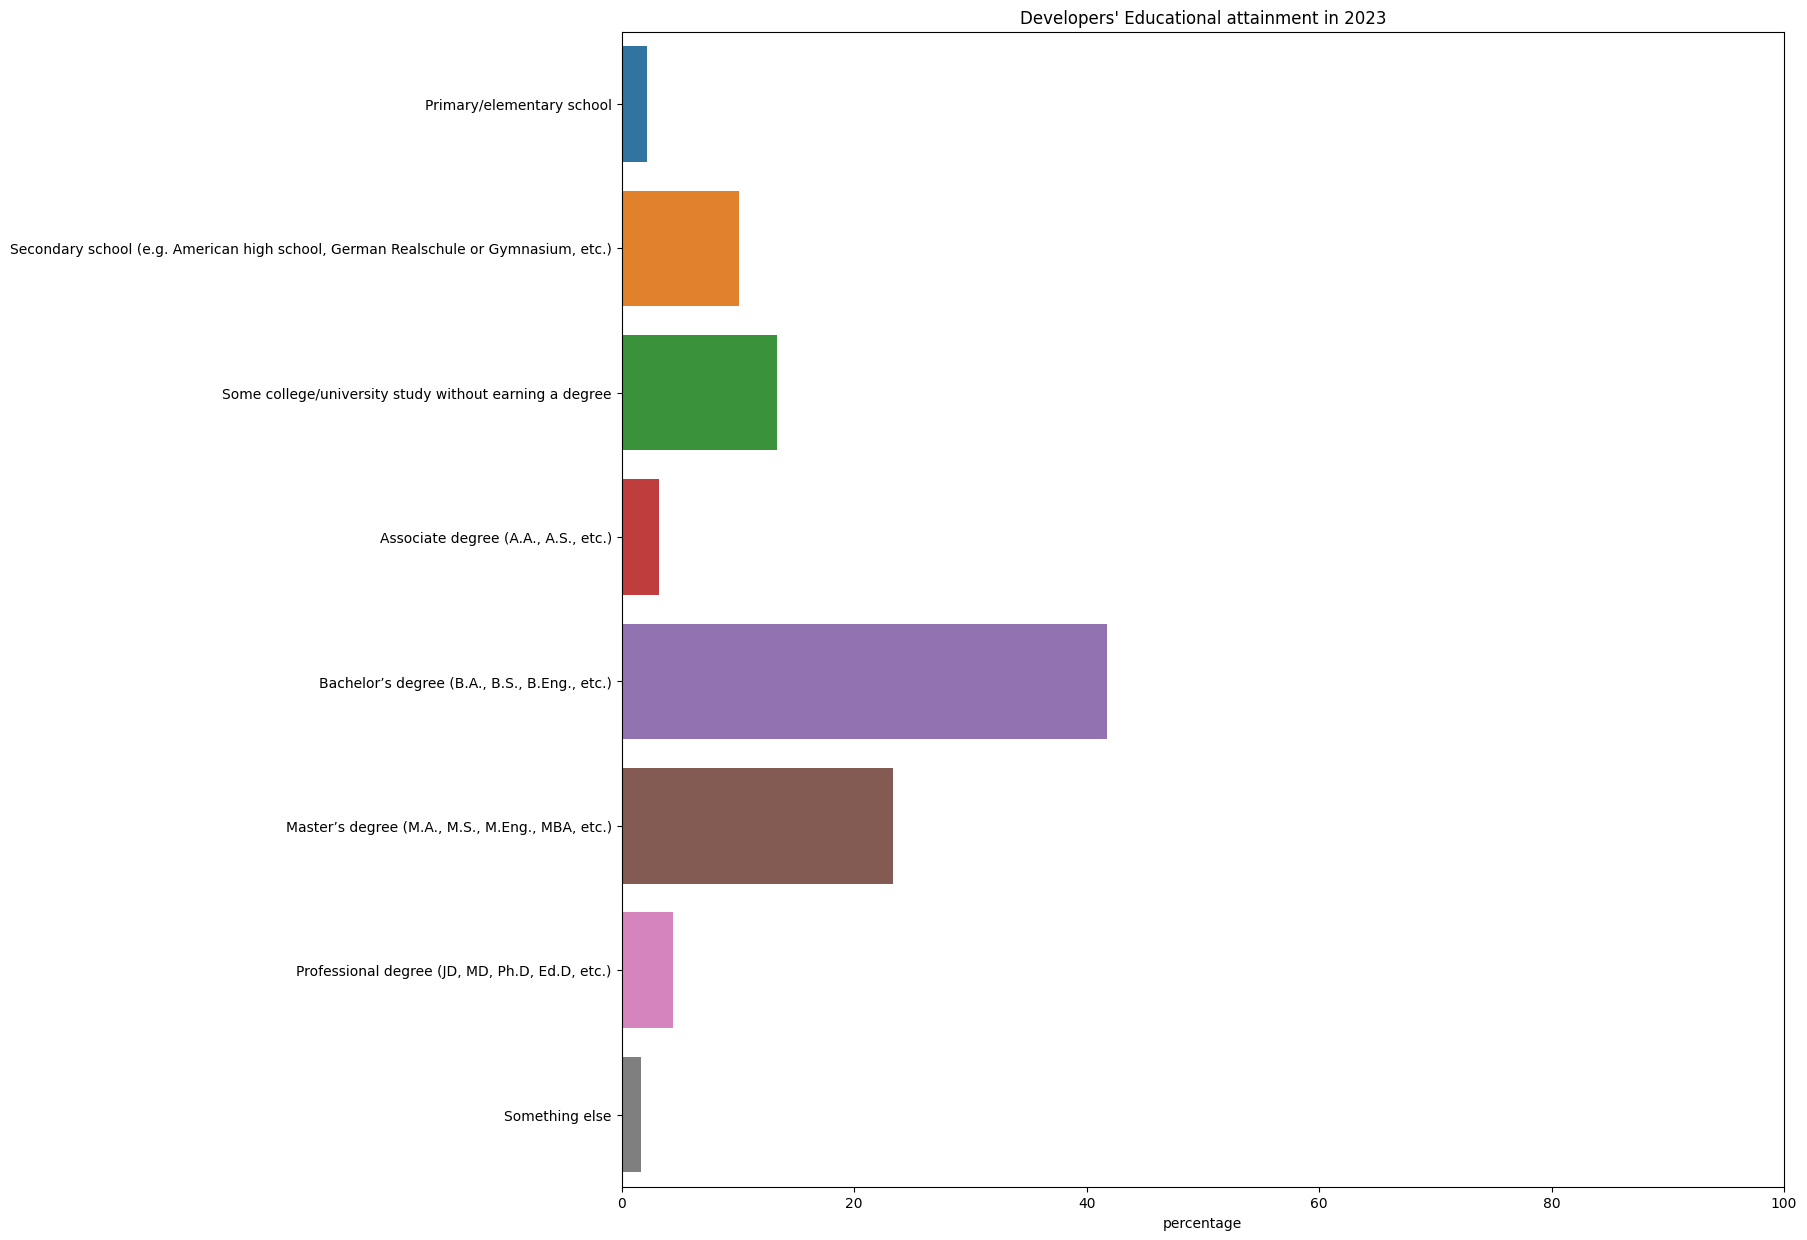

In [13]:
plt.figure(figsize=(15, 15))
gfg = sns.barplot(x=education_level_percentages, y=education_level_percentages.index)
gfg.set_xlim(0, 100)
plt.title("Developers' Educational attainment in 2023");
plt.xlabel('percentage');
plt.savefig("education.png", bbox_inches='tight')

## Question 2: The most popular technologies

In [7]:
language_have_worked_with_df = split_multi_col(survey["LanguageHaveWorkedWith"])
languages_worked_percentages = language_have_worked_with_df.mean().sort_values(ascending=False) * 100
language_have_worked_with_df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_10004\1704684148.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, items in column[column.notnull()].iteritems():


,HTML/CSS,JavaScript,Python,Bash/Shell (all shells),Go,PHP,Ruby,SQL,TypeScript,Ada,...,GDScript,Crystal,Cobol,Fortran,Prolog,Erlang,Apex,SAS,Nim,Flow
1,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,True,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,True,True,False,True,False,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False


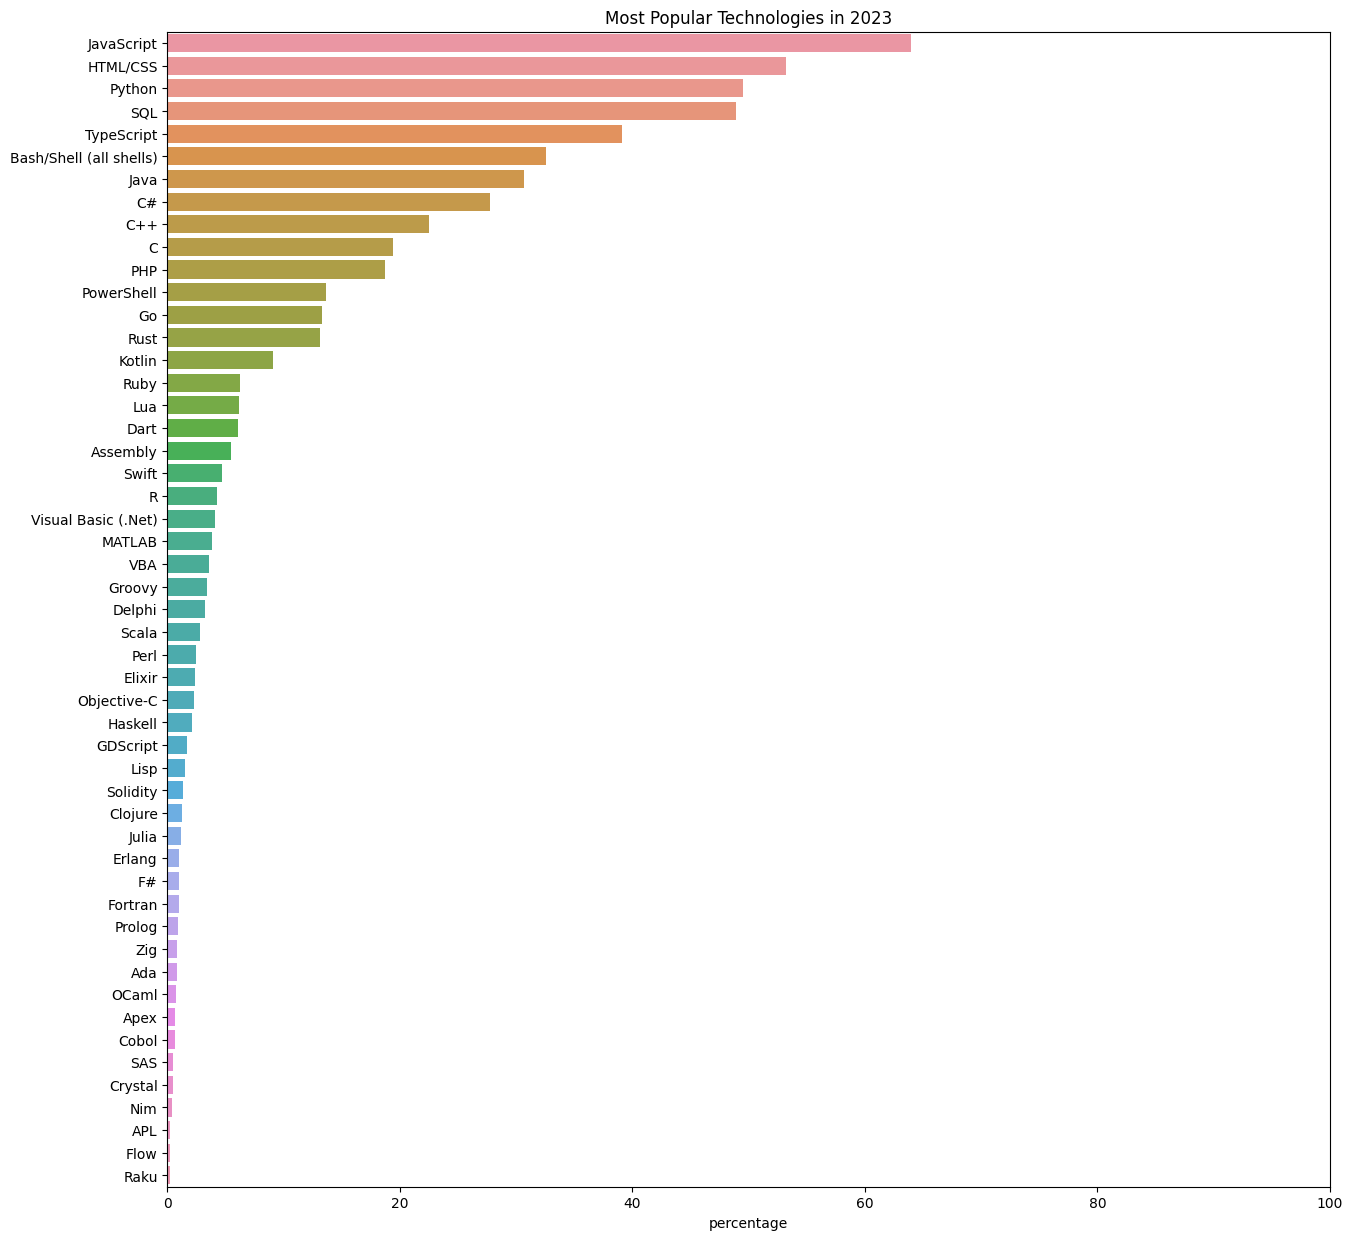

In [12]:
plt.figure(figsize=(15, 15))
gfg = sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
gfg.set_xlim(0, 100)
plt.title("Most Popular Technologies in 2023");
plt.xlabel('percentage');
plt.savefig("most-technologies.png", bbox_inches='tight')

## Question 3: AI In Development workflow

In [9]:
ai_currently_using_df = split_multi_col(survey["AIToolCurrently Using"])
ai_currently_using_percentages = ai_currently_using_df.mean().sort_values(ascending=False) * 100
ai_currently_using_df.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_10004\1704684148.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, items in column[column.notnull()].iteritems():


,Writing code,Committing and reviewing code,Learning about a codebase,Documenting code,Debugging and getting help,Project planning,Testing code,Collaborating with teammates,Deployment and monitoring,Other (please describe)
1,True,True,False,False,False,False,False,False,False,False
4,True,False,True,True,True,False,False,False,False,False
5,True,False,False,False,True,False,False,False,False,False
6,True,False,False,False,True,False,False,False,False,False
7,True,False,False,False,True,True,False,False,False,False


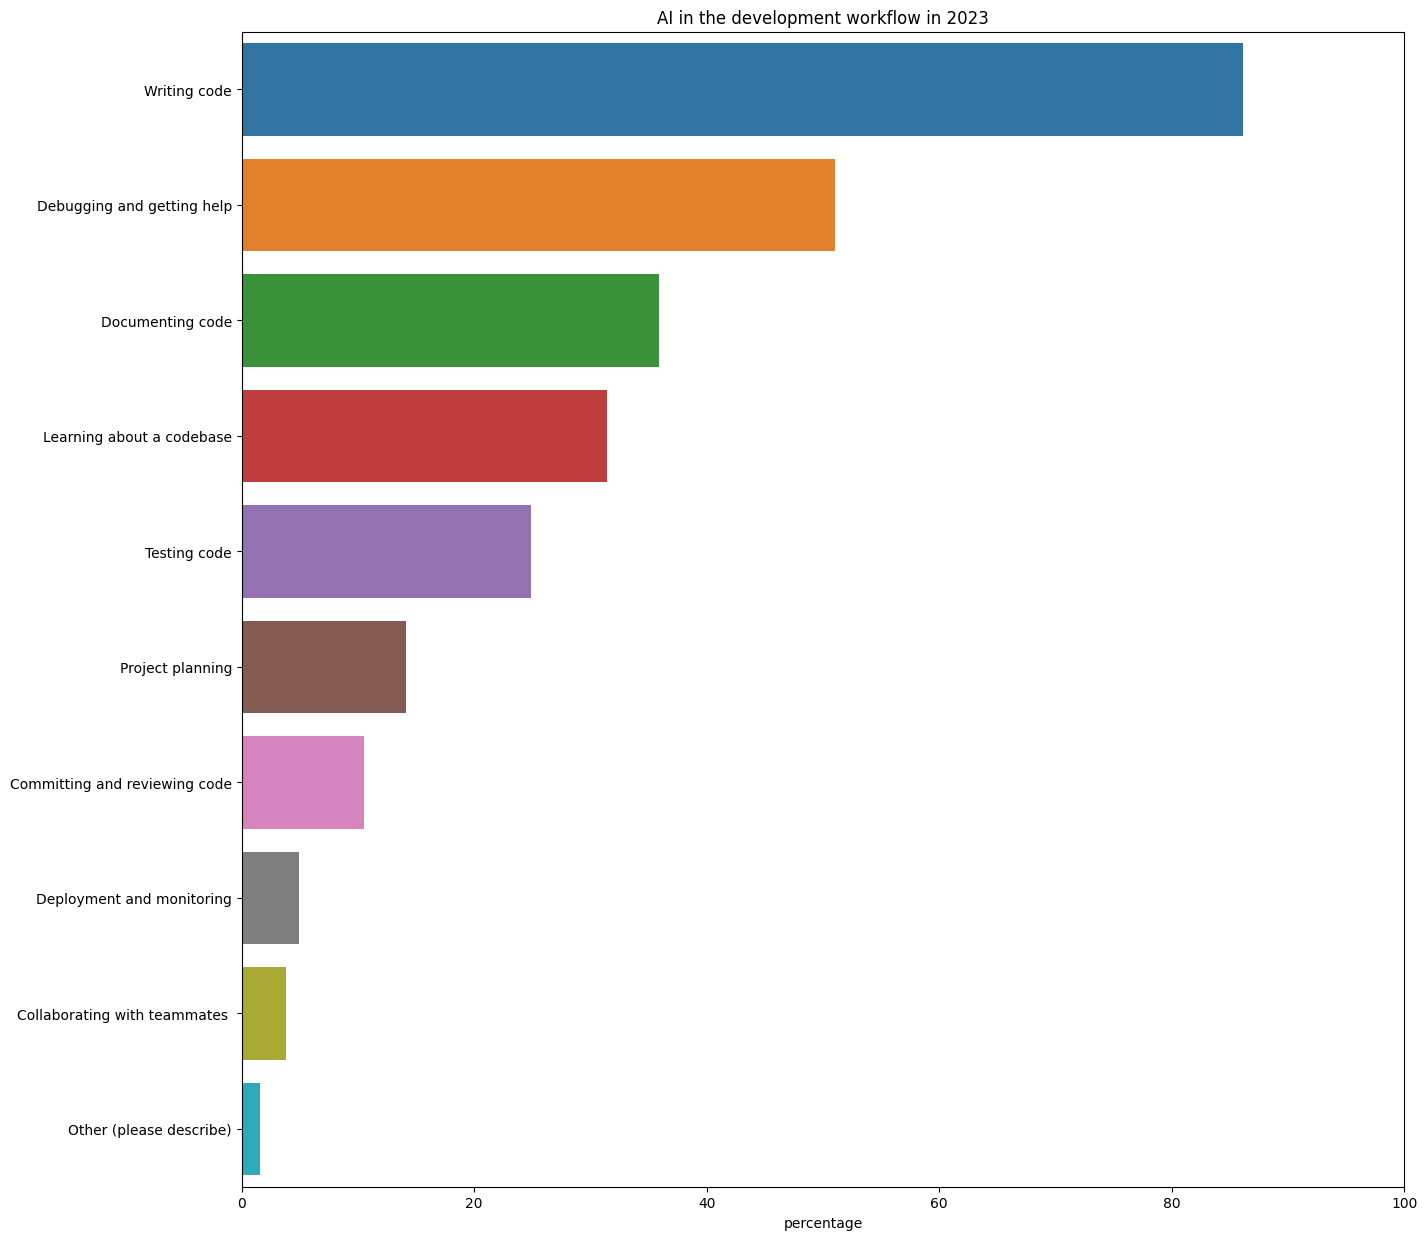

In [11]:
plt.figure(figsize=(15, 15))
gfg = sns.barplot(x=ai_currently_using_percentages, y=ai_currently_using_percentages.index)
gfg.set_xlim(0, 100)
plt.title("AI in the development workflow in 2023");
plt.xlabel('percentage');
plt.savefig("ai-development.png", bbox_inches='tight')